#### __Cohort Analysis__

Cohort analysis involves dividing users into distinct groups, or cohorts, based on certain criteria. In this study, these cohorts are defined by time users acquisition. By grouping users together based on time of acquisition, we can study how different cohorts behave in terms of engagement and retention.

For example you might create cohorts based on the month users first signed up for your service. You can then track how each cohort's activity, such as their conversion rate or lifetime value, evolves overtime. This approach allows you to identify trends, anomalies, and areas where you may need, to make adjustments to improve user retention and satisfaction.

#### __Retention Rate Time-Based Cohort Analysis:__

Retention rate time-based cohort analysis is a specialized form of cohort analysis that focuses on the retention of users over multiple time periods.

To perform retention rate time-based cohort analysis, you would typically:

* Create cohorts based on user acquisition dates.
* Measure the percentage of users from each cohort who continue to engage with your product or service overtime (e.g., after 1 month, 3 months, etc.).
* Analyze how retention rates vary across differetent cohorts and time periods, enabling you to identify trends and make data-driven decisions.

This analysis can reveal whether certain cohorts have better or worse retention rates, helping the business understand the factors contributing to user retention or attritution. It can also assist in optimizing marketing, product development, and customer support strategies.

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Load dataset

In [4]:
Dataset_ecommerce = pd.read_csv('C:/Users/Nelson/Downloads/Dataset_ecommerce.csv')

In [5]:
Dataset_ecommerce.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,12/1/2010 8:26,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,12/1/2010 8:26,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,12/1/2010 8:26,17850.0,SC3463,Books,78,61.49,Mali
3,536365,12/1/2010 8:26,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,12/1/2010 8:26,17850.0,SC2149,Toys,50,38.83,Rwanda


In [6]:
#descriptive Stat
Dataset_ecommerce.describe(include = "all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,10/31/2011 14:41,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [7]:
# Checking for missing values
Dataset_ecommerce.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [8]:
# drop missing values
Dataset_ecommerce.dropna(inplace = True)

In [9]:
Dataset_ecommerce.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [10]:
# Check for info on dataframe
Dataset_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [11]:
# convert to datatime format
Dataset_ecommerce["InvoiceDate"] = pd.to_datetime(Dataset_ecommerce["InvoiceDate"])

# Exploratory Data Analysis
__*Analysis by country*__

In [13]:
quantity_by_country = Dataset_ecommerce.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values("Quantity", ascending = False).reset_index()

In [14]:
quantity_by_country.head(3)

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229


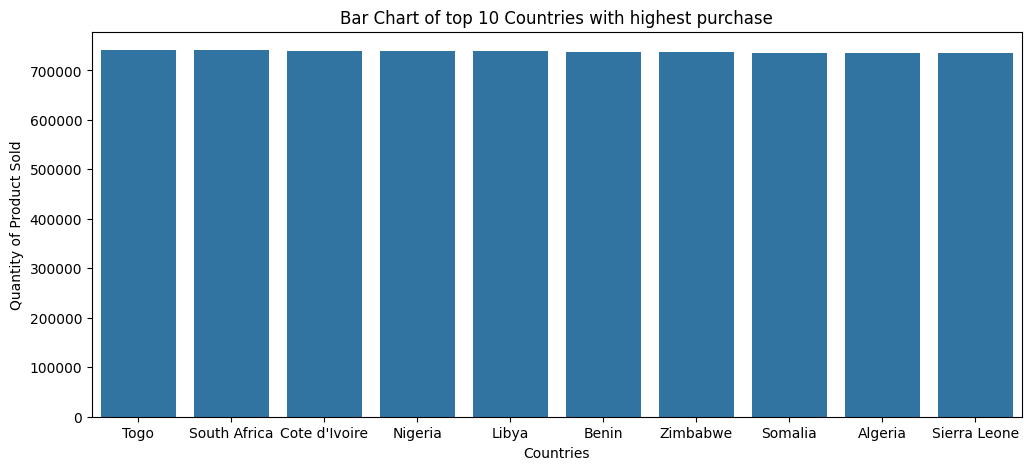

In [15]:
# Visualize top 10 Countries where most Products are Sold
top_10_country = quantity_by_country.head(10)

plt.figure(figsize = (12,5))
ax = sns.barplot(x = "Country", y = "Quantity", data = top_10_country)

plt.xlabel("Countries")
plt.ylabel("Quantity of Product Sold")
plt.title("Bar Chart of top 10 Countries with highest purchase")
plt.show()

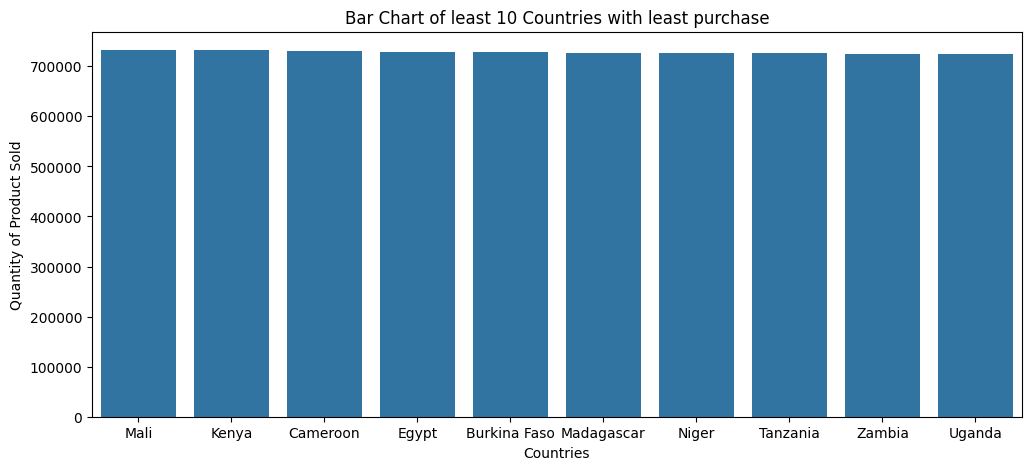

In [16]:
# Visualize least 10 Countries where most Products least Sold
least_10_country = quantity_by_country.tail(10)

plt.figure(figsize = (12,5))
ax = sns.barplot(x = "Country", y = "Quantity", data = least_10_country)

plt.xlabel("Countries")
plt.ylabel("Quantity of Product Sold")
plt.title("Bar Chart of least 10 Countries with least purchase")
plt.show()

### Analysis of Countries by Number of Customers

In [18]:
country_to_customer = Dataset_ecommerce.groupby(["Country"])["CustomerID"].nunique().reset_index()
country_to_customer = country_to_customer.sort_values("CustomerID",ascending = False).reset_index()

In [19]:
country_to_customer.head(3)

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053


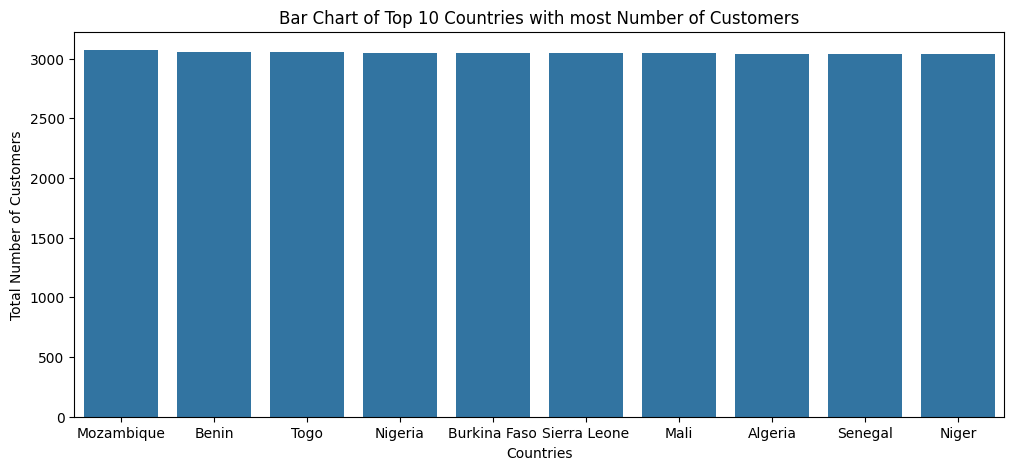

In [20]:
# top 10 countries with most number of customers
top_countries_to_customer = country_to_customer.head(10)

plt.figure(figsize = (12,5))
sns.barplot(x="Country", y = "CustomerID", data = top_countries_to_customer)

plt.title("Bar Chart of Top 10 Countries with most Number of Customers")
plt.xlabel("Countries")
plt.ylabel("Total Number of Customers")
plt.show()

### Sales Trend Visualization

In [23]:
monthly_sales = Dataset_ecommerce.groupby(Dataset_ecommerce["InvoiceDate"].dt.to_period("M"))["Quantity"].sum()

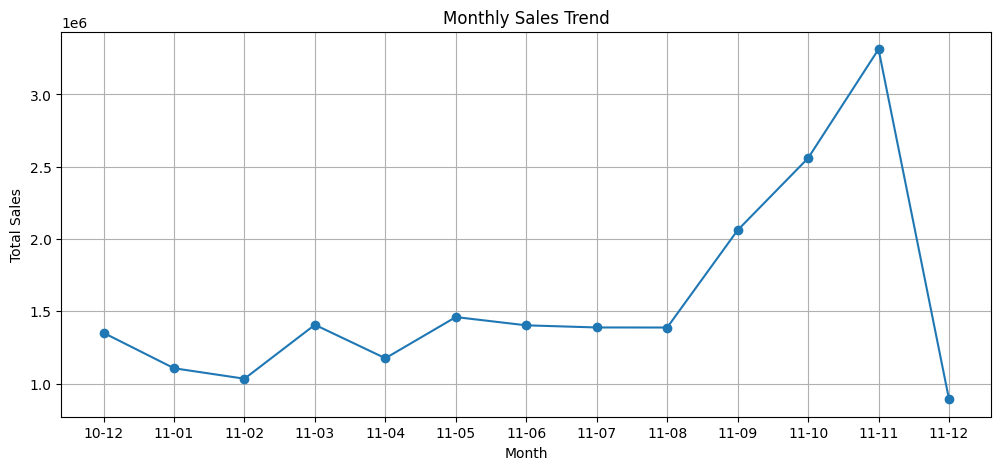

In [25]:
# Creating a line plot for sales trend visualization
plt.figure(figsize = (12,5))
plt.plot(monthly_sales.index.strftime("%y-%m"), monthly_sales.values, marker = 'o', linestyle = '-')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.grid(True)
plt.show()

## __Cohort Analysis__

In [28]:
Dataset_ecommerce.head

<bound method NDFrame.head of        InvoiceNo         InvoiceDate  CustomerID StockCode  Description  \
0         536365 2010-12-01 08:26:00     17850.0    SC1734  Electronics   
1         536365 2010-12-01 08:26:00     17850.0    SC2088    Furniture   
2         536365 2010-12-01 08:26:00     17850.0    SC3463        Books   
3         536365 2010-12-01 08:26:00     17850.0    SC6228         Toys   
4         536365 2010-12-01 08:26:00     17850.0    SC2149         Toys   
...          ...                 ...         ...       ...          ...   
541904    581587 2011-12-09 12:50:00     12680.0    SC5440    Furniture   
541905    581587 2011-12-09 12:50:00     12680.0    SC3576       Cloths   
541906    581587 2011-12-09 12:50:00     12680.0    SC5283    Furniture   
541907    581587 2011-12-09 12:50:00     12680.0    SC1099    Cosmetics   
541908    581587 2011-12-09 12:50:00     12680.0    SC9276         Toys   

        Quantity  UnitPrice       Country  
0             65      10.

In [30]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [31]:
Dataset_ecommerce["InvoiceDate"] = Dataset_ecommerce["InvoiceDate"].apply(get_month)

In [32]:
Dataset_ecommerce.head

<bound method NDFrame.head of        InvoiceNo InvoiceDate  CustomerID StockCode  Description  Quantity  \
0         536365  2010-12-01     17850.0    SC1734  Electronics        65   
1         536365  2010-12-01     17850.0    SC2088    Furniture        95   
2         536365  2010-12-01     17850.0    SC3463        Books        78   
3         536365  2010-12-01     17850.0    SC6228         Toys        15   
4         536365  2010-12-01     17850.0    SC2149         Toys        50   
...          ...         ...         ...       ...          ...       ...   
541904    581587  2011-12-01     12680.0    SC5440    Furniture        25   
541905    581587  2011-12-01     12680.0    SC3576       Cloths        94   
541906    581587  2011-12-01     12680.0    SC5283    Furniture        14   
541907    581587  2011-12-01     12680.0    SC1099    Cosmetics        45   
541908    581587  2011-12-01     12680.0    SC9276         Toys         6   

        UnitPrice       Country  
0          

In [33]:
def get_cohort_date(Dataset_ecommerce):
    Dataset_ecommerce["cohort date"] = Dataset_ecommerce.groupby("CustomerID")["InvoiceDate"].transform("min")
    return Dataset_ecommerce["cohort date"]
    

In [35]:
Dataset_ecommerce["cohort date"] = get_cohort_date(Dataset_ecommerce)

In [37]:
Dataset_ecommerce

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


### Cohort Index

In [39]:
def get_year_and_month(Dataset_ecommerce, col):

    month = Dataset_ecommerce[col].dt.month
    year = Dataset_ecommerce[col].dt.year
    return month, year

In [40]:
first_month, first_year = get_year_and_month(Dataset_ecommerce, "cohort date")

In [82]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort date, Length: 406829, dtype: int32

In [84]:
first_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: cohort date, Length: 406829, dtype: int32

In [47]:
latest_month, latest_year = get_year_and_month(Dataset_ecommerce,"InvoiceDate")

In [48]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

In [50]:
latest_year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int32

### Cohort Index

In [54]:
def create_cohort_index(first_month, first_year, latest_month, latest_year):
    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff*12 + month_diff + 1
    return index

In [60]:
Dataset_ecommerce["cohort_index"] = create_cohort_index(first_month, first_year, latest_month, latest_year)

In [62]:
Dataset_ecommerce

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5


### Cohort Table

In [144]:
cohort_info = Dataset_ecommerce.groupby(["cohort date", 'cohort_index'])["CustomerID"].nunique().reset_index()

In [146]:
cohort_info.rename(columns = {"CustomerID": "Number of Customers"}, inplace = True)

In [148]:
cohort_info

,cohort date,cohort_index,Number of Customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [156]:
cohort_table = cohort_info.pivot(index = "cohort date", columns = ["cohort_index"], values = "Number of Customers")
cohort_table.index.strftime("%B %Y")

Index(['December 2010', 'January 2011', 'February 2011', 'March 2011',
       'April 2011', 'May 2011', 'June 2011', 'July 2011', 'August 2011',
       'September 2011', 'October 2011', 'November 2011', 'December 2011'],
      dtype='object', name='cohort date')

In [158]:
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

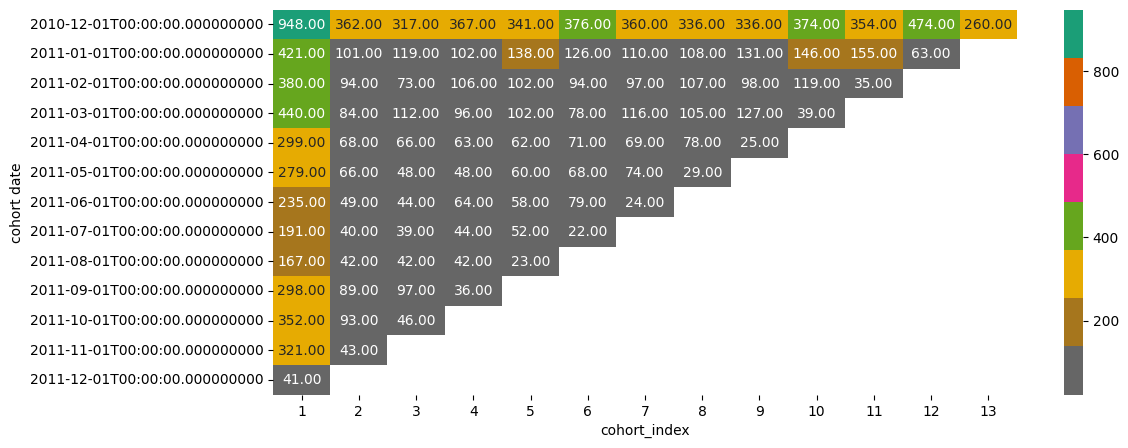

In [164]:
plt.figure(figsize = (12,5))
sns.heatmap(cohort_table, annot = True, cmap = "Dark2_r", fmt = ".2f")

In [166]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)

In [168]:
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

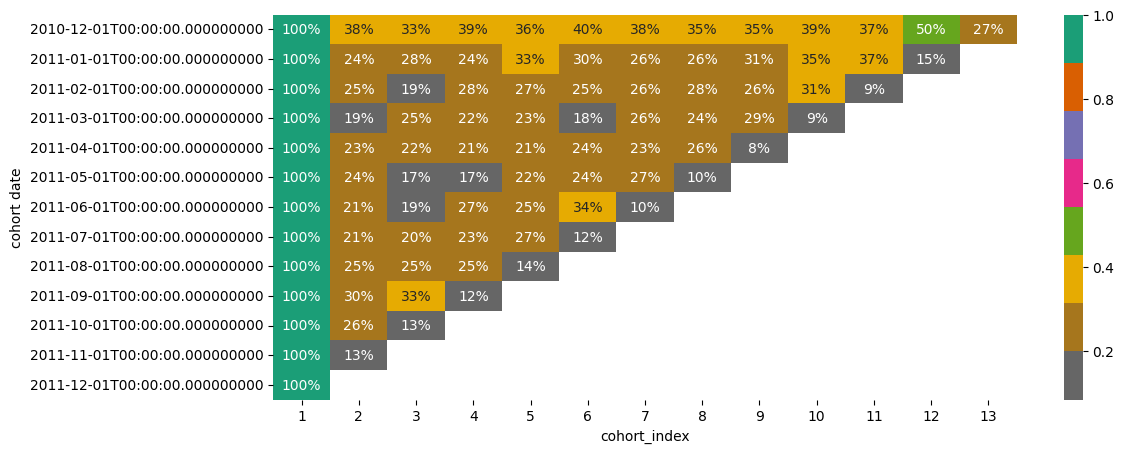

In [170]:
plt.figure(figsize = (12,5))
sns.heatmap(new_cohort_table, annot = True, cmap = "Dark2_r", fmt = ".0%")

**Quantity Bought**

In [118]:
quantity_bought = Dataset_ecommerce.groupby(["cohort date", "cohort_index"])["Quantity"].sum().reset_index()

In [120]:
quantity_bought

,cohort date,cohort_index,Quantity
0,2010-12-01,1,1350834
1,2010-12-01,2,546873
2,2010-12-01,3,462374
3,2010-12-01,4,613244
4,2010-12-01,5,510943
...,...,...,...
86,2011-10-01,2,181888
87,2011-10-01,3,44776
88,2011-11-01,1,574330
89,2011-11-01,2,56021


In [130]:
quantity_table = quantity_bought.pivot(index = "cohort date", columns = ["cohort_index"], values = "Quantity")
quantity_table.index = quantity_table.index.strftime("%B %Y")

In [124]:
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
2010-12-01,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
2011-01-01,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
2011-02-01,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
2011-03-01,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
2011-04-01,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
2011-05-01,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

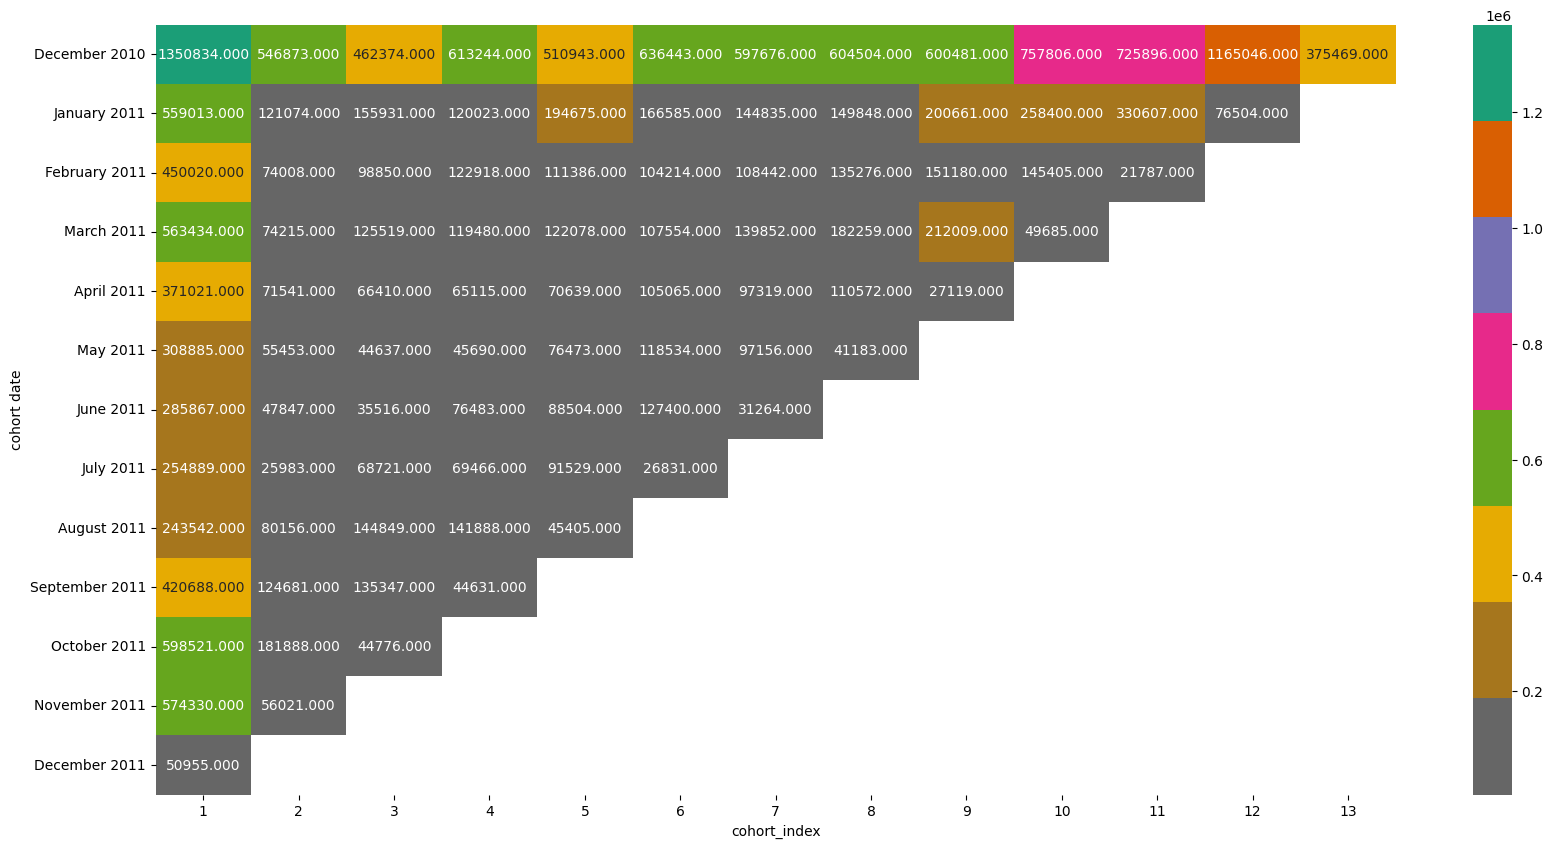

In [140]:
plt.figure(figsize = (20,10))
sns.heatmap(quantity_table, annot = True, cmap = "Dark2_r", fmt = ".3f")